In [9]:
import json
import pdfplumber
import pandas as pd


In [10]:
def is_text_inside_table(normal_text_coords, table_text_coords):
    # Define the bounding box for the normal text
    normal_text_bbox = (normal_text_coords['x0'], normal_text_coords['top'],
                        normal_text_coords['x1'], normal_text_coords['bottom'])

    # Define the bounding box for the table text
    table_text_bbox = (table_text_coords[0], table_text_coords[1],
                       table_text_coords[2], table_text_coords[3])

    is_inside = ( normal_text_bbox[2] > table_text_bbox[0] or
                    normal_text_bbox[0] < table_text_bbox[2] or
                    normal_text_bbox[3] > table_text_bbox[1] or
                    normal_text_bbox[1] < table_text_bbox[3]          
                    )
    text_bbox_position_of_table = {'top': normal_text_bbox[3] < table_text_bbox[1],
                                   'bottom': normal_text_bbox[1] > table_text_bbox[3],
                                   'left': normal_text_bbox[2] < table_text_bbox[0],
                                   'right': normal_text_bbox[0] > table_text_bbox[2]}
 
    return normal_text_bbox[1] < table_text_bbox[3] and normal_text_bbox[1] > table_text_bbox[1]

In [26]:

pdf_path='MEC.pdf'
with pdfplumber.open(pdf_path) as pdf:
    text_inSequence=[]
    
    for page in pdf.pages:
        if(page.page_number!=4):
            continue               
        elements = page.extract_text_lines(x0=0, y0=0, x1=page.width, y1=page.height)        
        tbls_location=page.find_tables()
        tbls=page.extract_tables()
                
        table_added=0
        is_table_added_1=False
        is_table_added_2=False
        is_table_added_3=False
        for element in elements:
            if len(tbls_location) == 0 or is_table_added_2 and is_table_added_1 and is_table_added_3:
                text_inSequence.append(element['text'])
                continue
            is_inside_2=False
            is_inside_3=False
            
            is_inside_1=is_text_inside_table(element, tbls_location[0].bbox)            
            if not is_inside_1 and len(tbls_location) > 1:
                is_inside_2=is_text_inside_table(element, tbls_location[1].bbox)            
            if not is_inside_1 and not is_inside_2 and len(tbls_location) > 1:
                is_inside_3=is_text_inside_table(element, tbls_location[3].bbox)
            
            if is_inside_1 and not is_table_added_1:
                text_inSequence.append(json.dumps(tbls[0]))
                is_table_added_1=True                
            if is_inside_2 and not is_table_added_2:
                text_inSequence.append(json.dumps(tbls[1]))
                is_table_added_2=True
            if is_inside_3 and not is_table_added_3:
                text_inSequence.append(json.dumps(tbls[1]))
                is_table_added_3=True
                            
            if not is_inside_1 and not is_inside_2 and not is_inside_2:
                text_inSequence.append(element['text'])
                
    for text_table in text_inSequence:
        print(text_table)

[["Emergency Medical Care", "Network Care", "Out-Of-Network Care"], ["Urgent Care Provider", "Not covered", "Not applicable"], ["Emergency Room", "Not covered", "Not applicable"], ["Emergency Ambulance", "Not covered", "Not applicable"], ["Non-Emergency Ambulance", "Not covered", "Not applicable"], ["Other Services and Plan Details", "Network Care", "Out-Of-Network Care"], ["Hospital Care", "Not covered", "Not applicable"], ["Mental Health and Alcohol/Drug Abuse Services", "Not covered", "Not applicable"], ["Skilled Nursing Facility", "Not covered", "Not applicable"], ["Therapy and Rehabilitation Services", "Not covered", "Not applicable"], ["Durable Medical Equipment", "Not covered", "Not applicable"], ["Mouth, Jaws, and Teeth Oral surgery procedures, medical in nature", "Not covered", "Not applicable"], ["Family Planning", "Not covered", "Not applicable"], ["Pharmacy \u2013 Prescription Drug and Discount Benefits Powered by Shield PBM", "Access & Discounts Available", null], ["Retail

In [32]:
pdf = pdfplumber.open("MEC.pdf")

In [33]:
p0 = pdf.pages[1]
im = p0.to_image()

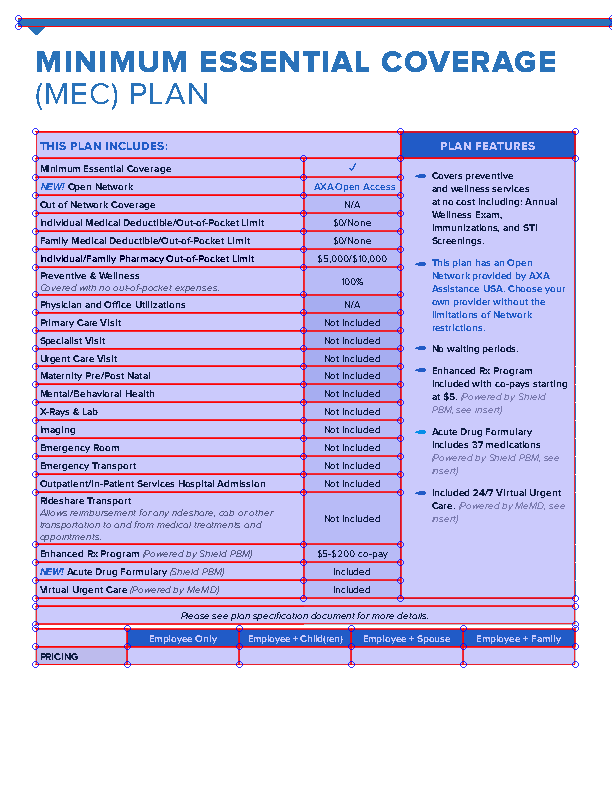

In [34]:
im.debug_tablefinder()